Quick estimate of centroiding accuracy as a function of signal to noise

In [1]:
from astropy.convolution import Gaussian1DKernel,convolve

In [2]:
# define our x axis: will be 10 "angstroms" wide with a 2-angstrom fwhm resolution
# Each resel will be sampled by 3 pixels
npix = 3*10/2.
x_angstroms = np.linspace(-5,5,npix)
pixel_scale = (x_angstroms.max()-x_angstroms.min())/npix

In [3]:
# Unresolved line.  Amplitude = 1
xcen = 0.4
# oversample, then downsample
x_hires = np.linspace(x_angstroms.min(),x_angstroms.max(),npix*10)
pixel_scale_hires = (x_hires.max()-x_hires.min())/(npix*10)
gg = np.exp(-(x_hires-xcen)**2/(2*0.1**2))
instrument_smooth_function = Gaussian1DKernel(2/pixel_scale_hires/2.35)
ggsm = convolve(gg, instrument_smooth_function)[::pixel_scale/pixel_scale_hires]

In [4]:
pixel_scale,pixel_scale_hires
ggsm.shape, npix, x_angstroms.size

((15,), 15.0, 15)

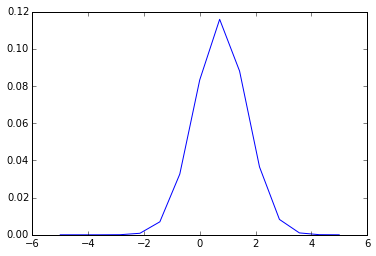

In [5]:
import pylab as pl
pl.plot(x_angstroms,ggsm)

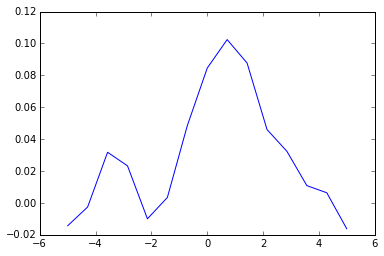

In [6]:
pl.plot(x_angstroms,ggsm+np.random.randn(ggsm.size)/76.)

In [7]:
from scipy.optimize import curve_fit

In [8]:
# fit a gaussian back to the input
def g(x,xc,sig): return np.exp(-(x-xc)**2/(2*sig**2))

In [9]:
curve_fit(g, x_angstroms, ggsm+np.random.randn(x_angstroms.size))

(array([ 2.2958368 ,  0.28893844]), array([[ 0.10112294, -0.01349861],
        [-0.01349861,  0.07642992]]))

In [10]:
y = [curve_fit(g,x_angstroms,ggsm+np.random.rand(npix)/76)[0][0] for i in range(1000)]

In [11]:
np.std(y)

0.0020042700665368765

(array([  28.,   65.,   99.,  157.,  174.,  173.,  121.,  108.,   54.,   21.]),
 array([ 1.05641315,  1.05736785,  1.05832256,  1.05927726,  1.06023197,
         1.06118668,  1.06214138,  1.06309609,  1.06405079,  1.0650055 ,
         1.0659602 ]),
 <a list of 10 Patch objects>)

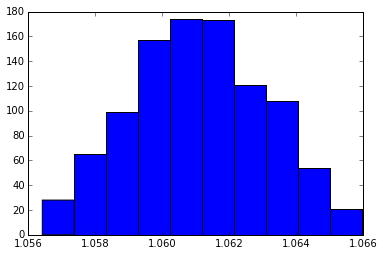

In [12]:
pl.hist(y)

In [13]:
z = [curve_fit(g,x_angstroms,ggsm+np.random.rand(x_angstroms.size)/214)[0][0] for i in range(1000)]

(array([  19.,   55.,  111.,  120.,  185.,  182.,  143.,  104.,   58.,   23.]),
 array([ 1.05908265,  1.05943181,  1.05978096,  1.06013012,  1.06047927,
         1.06082843,  1.06117758,  1.06152674,  1.06187589,  1.06222505,
         1.0625742 ]),
 <a list of 10 Patch objects>)

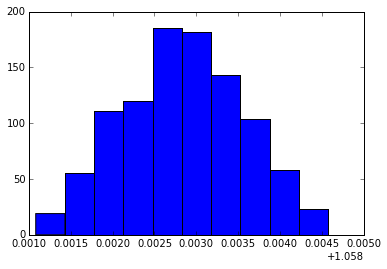

In [14]:
pl.hist(z)

In [15]:
np.std(z)

0.00071822267733075737